# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
import pandas as pd

student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
#student_data

Draw a dispersion diagram (scatter plot) for the data.

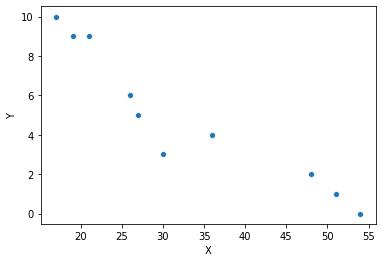

In [6]:
import seaborn as sns

sns.scatterplot(x = student_data['X'], y = student_data['Y'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
#It seems like there is a negative correlation : the older people are, the less tardies they have !

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [17]:
import numpy as np

correlation = student_data['X'].corr(student_data['Y'])
covariance = student_data['X'].cov(student_data['Y'])
print('Correlation:', correlation, '\nCovariance:', covariance)

#As covariance is negative, it confirms the negative value we had for correlation.

Correlation: -0.9391626886887122 
Covariance: -45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [20]:
from scipy import stats

X = student_data['X']
Y = student_data['Y']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

print('Slope:', slope, '\nIntercept:', intercept, '\nR value:', r_value)

predictions = [intercept + slope*x for x in X]


Slope: -0.2428207709159808 
Intercept: 12.888803363135768 
R value: -0.9391626886887121


Plot your regression model on your scatter plot.

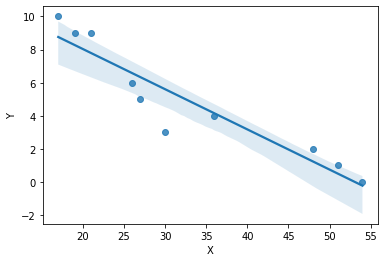

In [30]:
sns.regplot(x = student_data['X'], y = student_data['Y'])

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
"""
We can see that the regression line tends to be accurate within the scatterd plot.
And the theory seems to be proven with this sample. 
But it might not be useful to use it as a predictor
with another sample as there might be other factors that matter.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [23]:
import pandas as pd
import numpy as np
from scipy import stats

vehicles = pd.read_csv('C:\\Users\\sarah\\Documents\\IRONHACK\\dataV2-labs-master\\module-2\\Regression-Analysis\\vehicles.csv')
#vehicles

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [25]:
corr1 = vehicles['CO2 Emission Grams/Mile'].corr(vehicles['Year'])
corr2 = vehicles['CO2 Emission Grams/Mile'].corr(vehicles['Cylinders'])
corr3 = vehicles['CO2 Emission Grams/Mile'].corr(vehicles['Fuel Barrels/Year'])
corr4 = vehicles['CO2 Emission Grams/Mile'].corr(vehicles['Combined MPG'])
corr5 = vehicles['CO2 Emission Grams/Mile'].corr(vehicles['Fuel Cost/Year'])

print(corr1, corr2, corr3, corr4, corr5)

#The least helpful column is 'Year', as the correlation is the closest to 0 out of all 5.
#The 'Cylinders' column seems to have a positive correlation, but not good enough to make good predictions
#'Fuel Barrels/Year' has the best correlation with the CO2 emissions. 'Combined MPG' and 'Fuel Cost/Year' could
#also be good indicators as their correlations are close to 1 and -1.


-0.22229960295054238 0.7523925537297486 0.9861886621428727 -0.9262290389336444 0.9308651512201843


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Slope: 26.283625397470253 
Intercept: 12.4865208307574 
R value: 0.9861886621428727


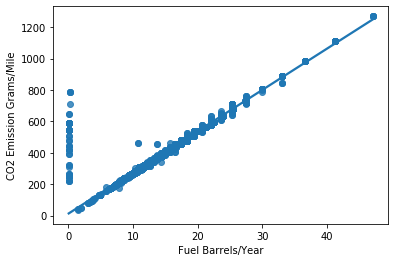

In [31]:
X = vehicles['Fuel Barrels/Year']
Y = vehicles['CO2 Emission Grams/Mile']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

print('Slope:', slope, '\nIntercept:', intercept, '\nR value:', r_value)

predictions = [intercept + slope*x for x in X]
residuals = [Y[i] - predictions[i] for i in range(len(Y))]
RMSE = np.sqrt(np.mean([residual**2 for residual in residuals]))
RMSE

sns.regplot(x = X, y = Y)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
"""
This models seems very accurate as all the values are scattered very close to the linear regresion.
But we can notice a few outliers, where it seems that some cars who do not use fuel, still produce CO2 emissions 
as there might be a correlation with another factor.

We can actually deduct that as long as a vehicle uses fuel, its CO2 emission can be predicted according to this model."""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 